![ed-5](ed-5.png "Title")
<center><h1>The Lyrics of Ed Sheeran's Songs</h1></center>
<center><h2>A Data Visualisation Exercise</h2></center>

# Abstract
Ed Sheeran is one of the hottest artists today (2019). He is the second artist to have 4 songs [cross 1 billion streams on Spotify](https://www.forbes.com/sites/hughmcintyre/2019/01/18/ed-sheeran-is-the-second-musician-to-see-four-hits-reach-one-billion-streams-on-spotify/#23b5263e5319). In this exercise, I want to see his songwriting prowess, in particular the lyrics he uses in his songs. 

Most of his songs revolve around love like Perfect, Thinking Out Loud and Shape of You. Hence, I expect to see many words that are related to these themes.

# Data Collection
I collected lyrics of 167 songs that belong to Ed Sheeran. This includes all his EPs and album releases. Of which I'll only use the songs from his last 3 studio albums 

- \+ (2011)
- × (2014)
- ÷ (2017)

In [11]:
import re
from collections import OrderedDict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

sns.set()

In [24]:
# Read from CSV file
df = pd.read_csv('ed-sheeran-lyrics-1.csv', sep='|')
df.drop(64, axis=0, inplace=True)
df.drop_duplicates(subset='title', keep='first', inplace=True)
songs_wanted = [
    # +
    'the-a-team', 'drunk', 'uni', 'grade-8', 'wake-me-up', 'small-bump', 
    'this', 'lego-house', 'kiss-me', 'give-me-love', 
    # x
    'one', 'im-a-mess', 'sing', 'dont', 'nina', 'photograph', 'bloodstream', 
    'tenerife-sea', 'runaway', 'the-man', 'thinking-out-loud', 'afire-love', 
    # ÷
    'eraser', 'castle-on-the-hill', 'dive', 'shape-of-you', 'perfect', 
    'galway-girl', 'happier', 'new-man', 'hearts-dont-break-around-here', 'what-do-i-know', 'how-would-you-feel-paean', 'supermarket-flowers', 'barcelona', 'bibia-be-ye-ye', 'nancy-mulligan', 'save-myself']
print(len(songs_wanted))
df = df[df['title'].isin(songs_wanted)]
df.reset_index(drop=True, inplace=True)
print(df.shape)

38
(38, 2)


## Text Normalisation

We shall perform the simplest normalisation techniques on our words. The first step is to:

1. convert them all to lower case
2. remove trailing and leading spaces

This can be done via a `lambda` function.

In [25]:
df['lyrics_step1'] = df['lyrics'].apply(lambda x : x.lower().strip())

Let's see what happens to the lyrics after the normalisation.

In [28]:
s = df.iloc[19] # or df.sample()
print(s['title'])
print('---')
print(s['lyrics'].strip()[:500])
print('---')
print(s['lyrics_step1'][:500])

the-man
---
No, I don't wanna hate you Just wish you'd never gone for the man And waited two weeks at least Before you let him take you I stayed true I kind of knew you liked the dude from private school He's waiting for the time to move I knew he had his eyes on you He's not the right guy for you Don't hate me cause I write the truth No I would never lie to you But it was never fine to lose you And what a way to find out It never came from my mouth You never changed your mind But you were just afraid to mi
---
no, i don't wanna hate you just wish you'd never gone for the man and waited two weeks at least before you let him take you i stayed true i kind of knew you liked the dude from private school he's waiting for the time to move i knew he had his eyes on you he's not the right guy for you don't hate me cause i write the truth no i would never lie to you but it was never fine to lose you and what a way to find out it never came from my mouth you never changed your mind but you were 

Let's take a look at another song - Shape of You.

In [30]:
s = df[df['title'] == 'shape-of-you'].iloc[0]
print(s['title'])
print('---')
print(s['lyrics'].strip()[:500])
print('---')
print(s['lyrics_step1'][:500])

shape-of-you
---
The club isn't the best place to find a lover So the bar is where I go (mmmm) Me and my friends at the table doing shots Drinking fast and then we talk slow (mmmm) And you come over and start up a conversation with just me And trust me I'll give it a chance now (mmmm) Take my hand, stop, put Van The Man on the jukebox And then we start to dance And now I'm singing like  Girl, you know I want your love Your love was handmade for somebody like me Come on now, follow my lead I may be crazy, don't m
---
the club isn't the best place to find a lover so the bar is where i go (mmmm) me and my friends at the table doing shots drinking fast and then we talk slow (mmmm) and you come over and start up a conversation with just me and trust me i'll give it a chance now (mmmm) take my hand, stop, put van the man on the jukebox and then we start to dance and now i'm singing like  girl, you know i want your love your love was handmade for somebody like me come on now, follow my lead i

It looks like we might need to do more in the special characters removal department. Let's see how many terms have special characters and if they affect the overall counts.

In [64]:
all_lyrics_str = ' '.join(df['lyrics_step1'].tolist())
all_lyrics_str = all_lyrics_str.encode('ascii', 'ignore').decode() #remove non-ascii characters

all_lyrics = all_lyrics_str.split()
print(len(all_lyrics)) # There are 14987 lyrics in these 38 songs.

all_lyrics_set = set(all_lyrics)
print(len(all_lyrics_set)) # Of which there are only 2005 unique words.

14987
2005


As you can see, we find words that do not start with alphabets **OR** do not end with alphabets. For these words, we use a simple regex expression to remove the special characters. These include punctuation marks and parentheses. Observe how the word is transformed.

In [67]:
for w in list(all_lyrics_set)[:100]: # Remove the index to see the full list of words transformed.
    if not(re.search("^\w", w) is not None and re.search("\w$", w) is not None):
        print("BEFORE: %s |AFTER: %s" % (w, re.sub('\W', '', w)))

BEFORE: weekend, |AFTER: weekend
BEFORE: beds, |AFTER: beds
BEFORE: (love |AFTER: love
BEFORE: 'til |AFTER: til
BEFORE: chaser, |AFTER: chaser
BEFORE: love? |AFTER: love
BEFORE: dad, |AFTER: dad
BEFORE: [3x] |AFTER: 3x
BEFORE: up, |AFTER: up
BEFORE: away, |AFTER: away
BEFORE: degree, |AFTER: degree
BEFORE: solved) |AFTER: solved
BEFORE: pieces. |AFTER: pieces
BEFORE: awake, |AFTER: awake
BEFORE: [4x] |AFTER: 4x


In [96]:
# Perform the removal of special characters according to above rule
all_lyrics2 = [re.sub('\W', '', w) 
               if not(re.search("^\w", w) is not None and re.search("\w$", w) is not None) 
               else w 
               for w in all_lyrics]
print(len((all_lyrics2))) # Now there are only 1764 unique words, instead of 2005
print(len(set(all_lyrics2))) # Now there are only 1764 unique words, instead of 2005
print(len((all_lyrics2))/len(set(all_lyrics2)))

14987
1764
8.496031746031745


Let's consider some numerical facts about these words. If there are 14987 terms and 1764 unique terms, then on average there are 8.5 occurences of each word. 

In [154]:
w_df = pd.DataFrame(all_lyrics2, columns=['wd'])
w_df_agg = w_df.groupby('wd').size().reset_index(name='n')
w_df_agg.sort_values('n', ascending=False, inplace=True)
print("Top 10 most commont words")
print(w_df_agg[:10])

Top 10 most commont words
        wd    n
718      i  597
1755   you  490
1508   the  486
64     and  476
967     my  474
907     me  308
726     in  289
1552    to  279
875   love  265
20       a  250


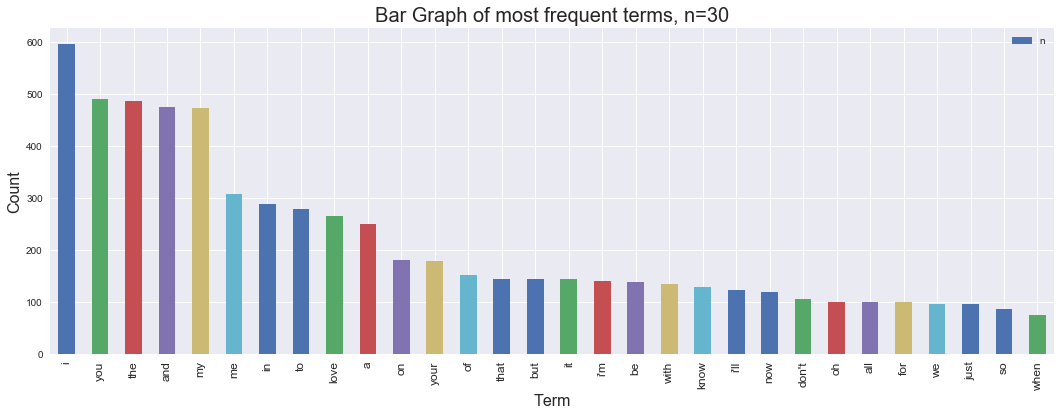

In [155]:
fig, ax = plt.subplots(figsize=(18, 6))
w_df_agg[:30].plot(kind='bar', x='wd', y='n', ax=ax)
ax.set_xticklabels(w_df_agg[:30]['wd'], fontsize=14)
ax.set_title("Bar Graph of most frequent terms, n=30", fontsize=20)
ax.set_xticklabels(w_df_agg[:30]['wd'], fontsize=12)
ax.set_ylabel("Count", fontsize=16)
ax.set_xlabel("Term", fontsize=16)
plt.show()

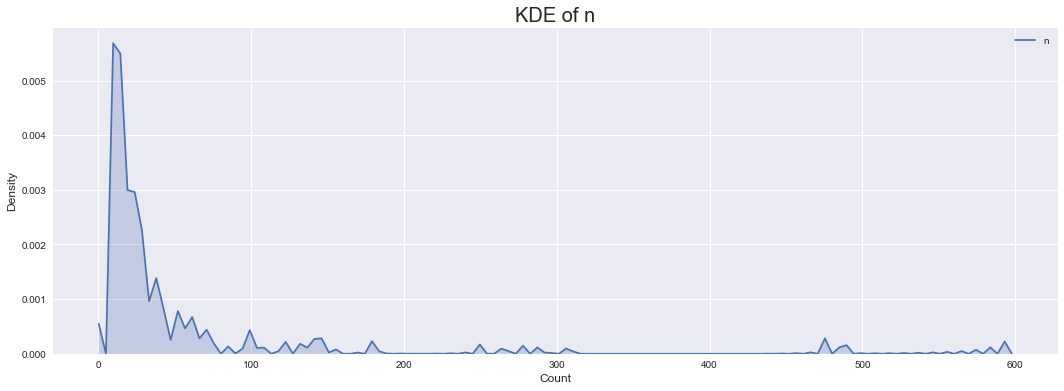

In [161]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.kdeplot(w_df_agg['n'], shade=True, ax=ax, bw=0.25)
ax.set_title("KDE of n", fontsize=20)
ax.set_ylabel("Density", fontsize=12)
ax.set_xlabel("Count", fontsize=12)
plt.show()

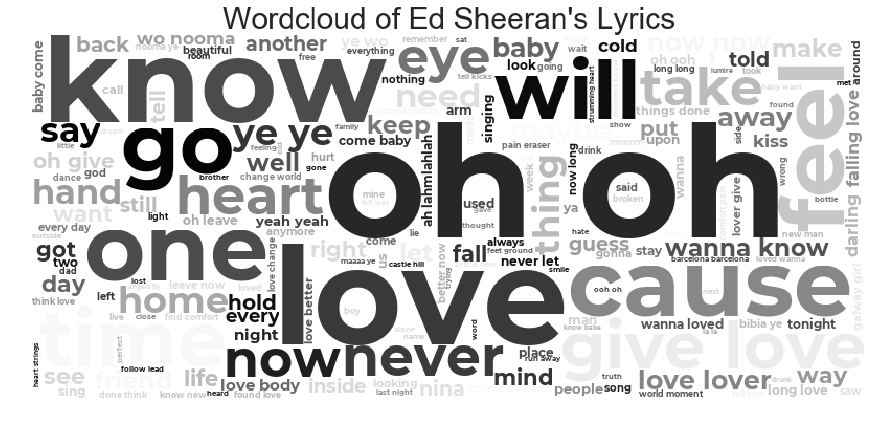

In [164]:
v = ' '.join(all_lyrics2)
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(font_path="Montserrat-Bold.ttf", width=800, height=350, 
                           background_color='white', relative_scaling = 0.5, colormap='gray', 
                           max_words=200, collocations=True, stopwords=None).generate(v)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=30)
plt.show()

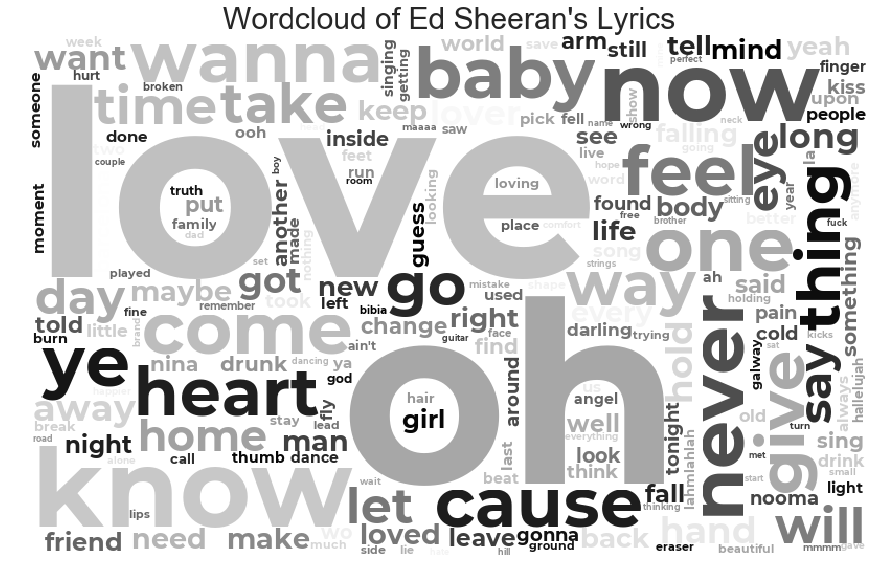

In [142]:
v = ' '.join(all_lyrics2)
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(font_path="Montserrat-Bold.ttf", width=800, height=500, 
                           background_color='white', relative_scaling = 0.5, colormap='binary', 
                           max_words=200, collocations=False, stopwords=None).generate(v)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=30)
plt.show()